In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt

In [62]:
sns.set_theme(style='darkgrid')

In [3]:
X = pd.read_csv('googleplaystore.csv')

In [4]:
X.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
X.Type.value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [14]:
X = X[X.Type != '0'].reset_index(drop=True)

<AxesSubplot:>

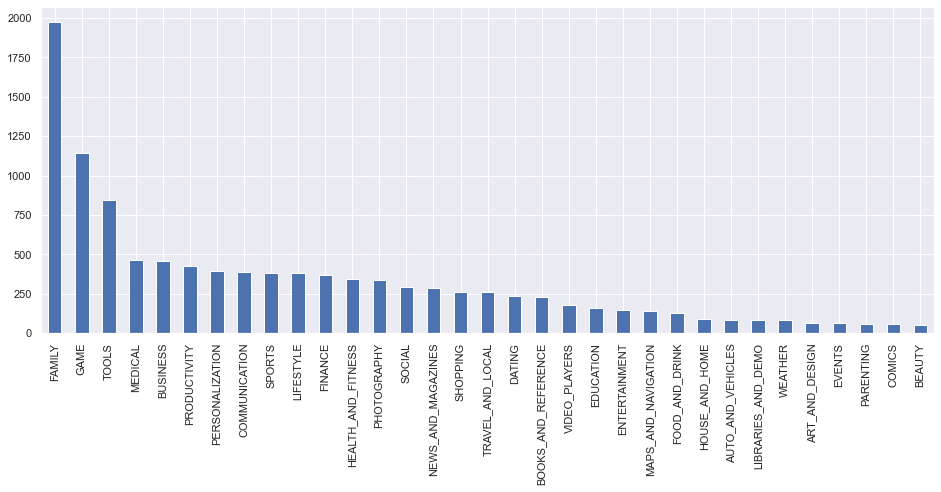

In [20]:
# X.Category.value_counts().plot(kind='bar', figsize=(16, 6))
X.Category.value_counts().plot.bar(figsize=(16, 6))

In [21]:
X.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Text(0.5, 1.0, 'Rating boxplot')

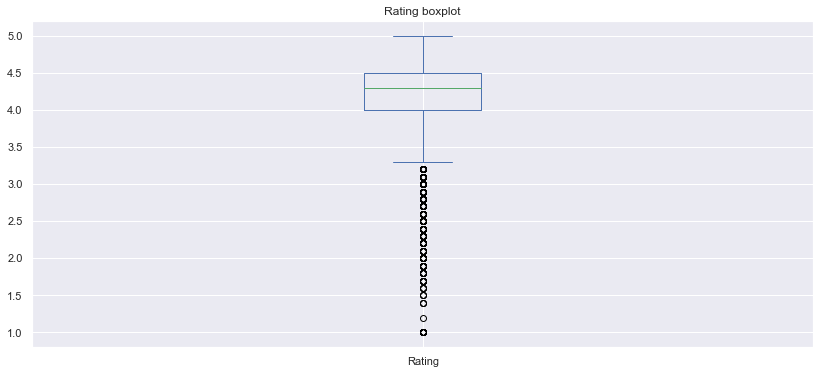

In [33]:
X.Rating.plot.box(figsize=(14, 6))
plt.title('Rating boxplot')

Text(0.5, 1.0, 'Rating KDE-plot')

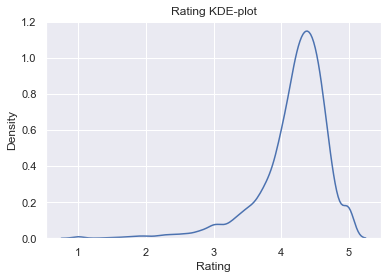

In [64]:
sns.kdeplot(data=X, x='Rating')
plt.title('Rating KDE-plot')

In [47]:
X.Price = X.Price.str.extract('\$?(.*)')[0].astype(float)

Text(0.5, 1.0, 'Price histogram')

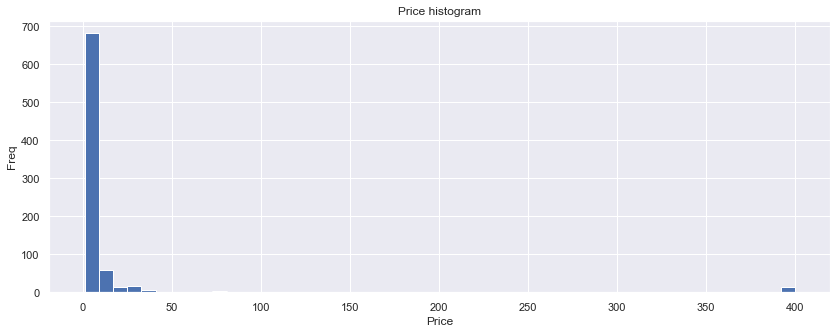

In [57]:
X.Price[X.Price != 0].plot.hist(bins=50, figsize=(14, 5))
plt.xlabel('Price')
plt.ylabel('Freq')
plt.title('Price histogram')

In [65]:
X['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

/usr/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

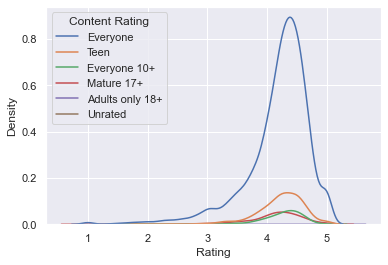

In [68]:
sns.kdeplot(data=X, x='Rating', hue='Content Rating')

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

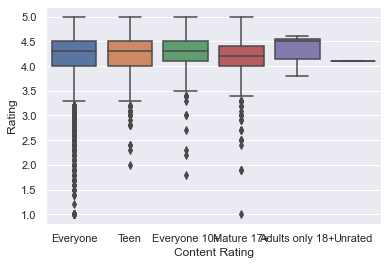

In [71]:
sns.boxplot(data=X, y='Rating', x='Content Rating')

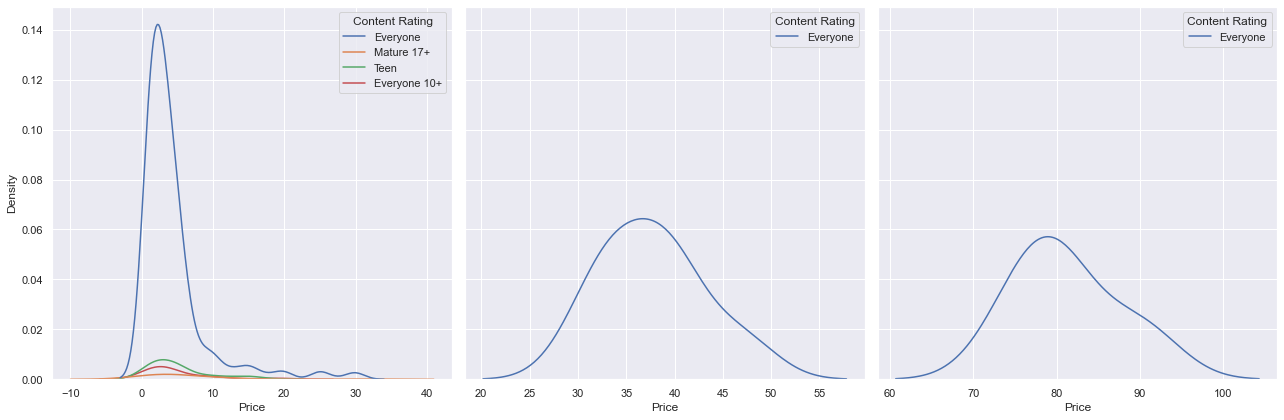

In [79]:
fig, axis = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

step = 30
P = X[X.Price > 0]
for i in range(0, 3):
    price_from = i*step
    price_to = price_from + step
    sns.kdeplot(data=P[(P.Price >= price_from) & (P.Price < price_to)], x='Price', hue='Content Rating', ax=axis[i])

plt.tight_layout()

Text(0, 0.5, 'AVG Price')

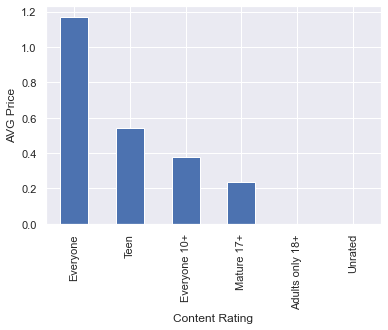

In [85]:
X.groupby('Content Rating').Price.mean().sort_values(ascending=False).plot.bar()
plt.ylabel('AVG Price')

In [88]:
v = X[X.Category.isin(['FAMILY', 'TOOLS', 'GAME'])].pivot_table(index='Content Rating', columns='Category', values='Price', 
                    aggfunc='mean').round(3)
v

Category,FAMILY,GAME,TOOLS
Content Rating,,,
Everyone,1.428,0.212,0.316
Everyone 10+,0.716,0.251,NaN
Mature 17+,0.899,0.189,1.495
Teen,0.433,0.338,0.000
Unrated,0.000,NaN,0.000


<AxesSubplot:xlabel='Content Rating'>

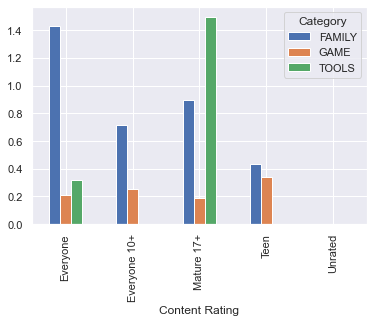

In [93]:
v.plot.bar()

<AxesSubplot:xlabel='Category', ylabel='Content Rating'>

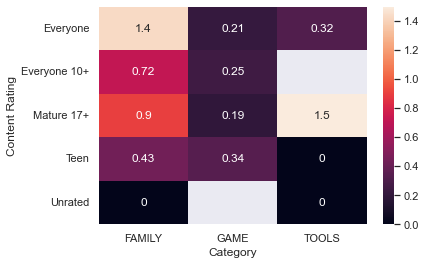

In [90]:
sns.heatmap(v, annot=True)

In [96]:
X['date'] = pd.to_datetime(X['Last Updated'])

In [100]:
v = X[X.Price > 0].groupby('date').Price.mean()

<AxesSubplot:xlabel='date'>

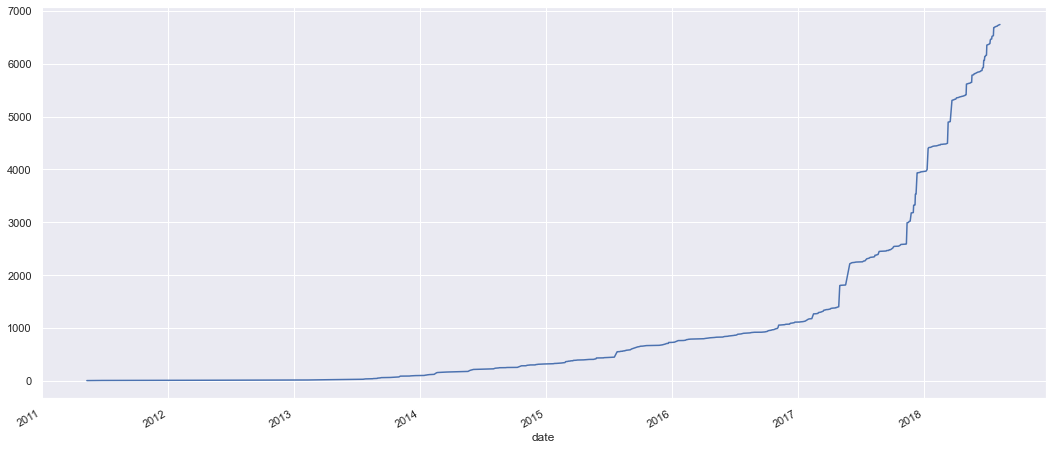

In [104]:
v.cumsum().plot(figsize=(18, 8))

In [109]:
X[['Reviews', 'Type']].dtypes

Reviews    object
Type       object
dtype: object

(4.0, 5.0)

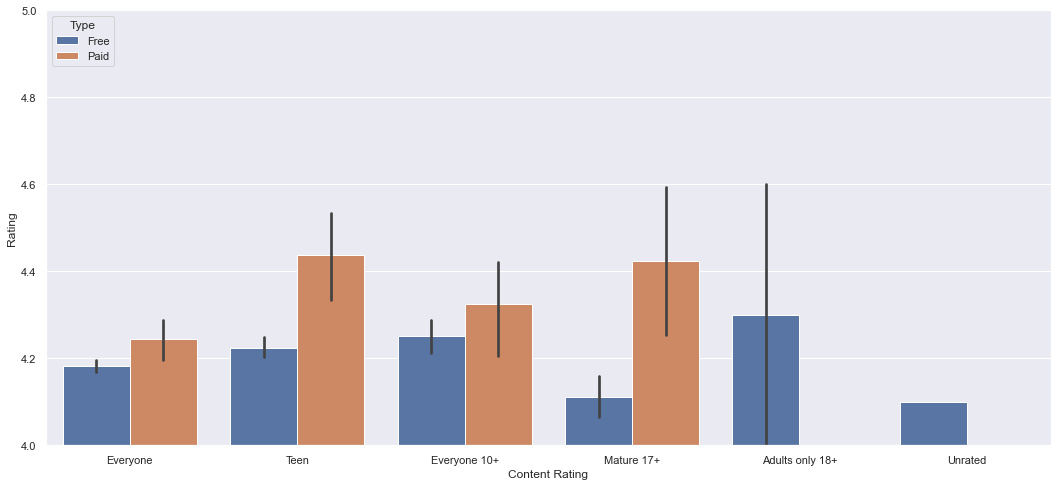

In [117]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(data=X, y='Rating', hue='Type', x='Content Rating', ax=ax)
plt.ylim(4, 5)